In [1]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
genderClassModel = pd.read_csv("genderclassmodel.csv")
genderModel = pd.read_csv("gendermodel.csv")

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()
#train.loc[train.Embarked.isnull(), "Embarked"] = "S"

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#from ggplot import *
#diamonds.head()


In [6]:
train.Embarked = train.Embarked.fillna("NA")
test.Embarked = test.Embarked.fillna("NA")
drop_columns = ["PassengerId", "Survived", "Name", "Ticket", "Cabin"]

test_sel_1 = train.sample(50)

train_sel = train.drop(drop_columns, axis = 1)
train_class = train["Survived"]

train_sel.drop(test_sel_1.index, axis = 0)

drop_columns.remove("Survived")
test_sel_1 = test_sel_1.drop(drop_columns, axis = 1)
test_sel_1_class = test_sel_1.Survived
test_sel_1 = test_sel_1.drop("Survived", axis = 1)

test_sel_2 = test.drop(drop_columns, axis = 1)

In [35]:
train_sel[["Fare","Parch"]]

,Fare,Parch
0,7.2500,0
1,71.2833,0
2,7.9250,0
3,53.1000,0
4,8.0500,0
5,8.4583,0
6,51.8625,0
7,21.0750,1
8,11.1333,2
9,30.0708,0


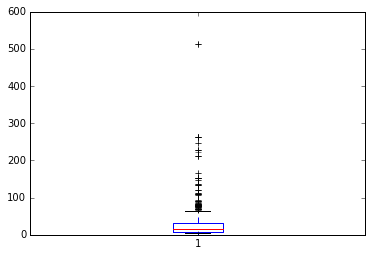

In [36]:
#train.plot.scatter??

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(train_sel.Fare)
ax.boxplot(train_sel.Parch)
plt.show()

In [7]:
le_embarked = preprocessing.LabelEncoder()
le_sex = preprocessing.LabelEncoder()

#train_sel.Embarked = mv_embarked.transform(train_sel.Embarked)
le_embarked.fit(["S", "C", "Q", "NA"]) # To convert NA categorical values.
le_sex.fit(["female", "male"])

train_sel.Embarked = le_embarked.transform(train_sel.Embarked)
train_sel.Sex = le_sex.transform(train_sel.Sex)

test_sel_1.Embarked = le_embarked.transform(test_sel_1.Embarked)
test_sel_1.Sex = le_sex.transform(test_sel_1.Sex)

test_sel_2.Embarked = le_embarked.transform(test_sel_2.Embarked)
test_sel_2.Sex = le_sex.transform(test_sel_2.Sex)


In [8]:

im_age = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0);
im_age.fit(train_sel)
train_sel_trans = im_age.transform(train_sel)

test_sel_1_trans = im_age.transform(test_sel_1)
test_sel_2_trans = im_age.transform(test_sel_2)


In [9]:
if 0: 
    ("""
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

""")


In [10]:
## Let's try to Preprocess the data
try:
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    clf.fit(train_sel_trans, train_class)
except ValueError as e:
    print (e.message)

In [11]:
## Preliminary Training a model using decision tree
clfD = tree.DecisionTreeClassifier()
clfD.fit(train_sel_trans, train_class)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [12]:
# predict
pred_class = clf.predict(train_sel_trans)
accuracy_score(train_class, pred_class)

0.79236812570145898

In [13]:
pred_class = clf.predict(test_sel_1_trans)
accuracy_score(test_sel_1_class, pred_class)

0.71999999999999997

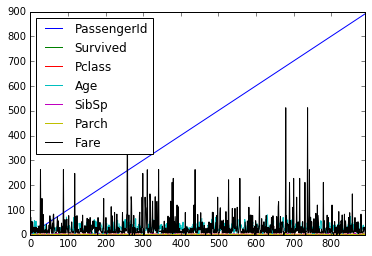